In [12]:
import pandas as pd

In [13]:
data_location = 'C:/Users/kaley/OneDrive/Documents/Data Science/Mental Health Project/Sample Data/'
mood_data_location = data_location+'FinchExport_2023-06-22/Mood.json'
tag_data_location = data_location+'FinchExport_2023-06-22/Tag.json'

In [14]:
mood_data = pd.read_json(mood_data_location, lines=True)

In [15]:
mood_data.head()

,dt,mood_type,value,updated_time
0,"Sat, 6 May 2023 14:00:58",feeling,4,2023-05-06 14:00:58
1,"Wed, 2 Nov 2022 09:04:11",motivation,3,2022-11-02 09:04:11
2,"Wed, 2 Nov 2022 22:06:19",satisfaction,1,2022-11-02 22:06:19
3,"Thu, 27 Oct 2022 00:48:53",feeling,3,2022-10-27 00:48:53
4,"Fri, 30 Dec 2022 15:40:18",feeling,3,2022-12-30 15:40:18


In [16]:
mood_data.describe()

,value
count,1091.000000
mean,3.714940
std,0.747072
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [17]:
mood_data.groupby(by=['mood_type']).count()

,dt,value,updated_time
mood_type,,,
feeling,679,679,679
motivation,225,225,225
satisfaction,187,187,187


In [18]:
# these are the three categories of Mood available from my Finch data
# from my understanding, based on using the Finch app, the categories are:
#  * feeling : 1 to 5, "sad" face to "happy" face, how I felt in that moment
#  * motivation : 1 to 5, how motivated I feel for the day ahead, asked when I first open the app that day
#  * satisfaction : 1 to 5, how satisfied I felt for the day, asked at the end of the day

In [19]:
feeling_data = mood_data[mood_data['mood_type'] == 'feeling']

In [20]:
feeling_data = feeling_data[['dt', 'value']]

In [21]:
feeling_data.head()

,dt,value
0,"Sat, 6 May 2023 14:00:58",4
3,"Thu, 27 Oct 2022 00:48:53",3
4,"Fri, 30 Dec 2022 15:40:18",3
7,"Wed, 1 Feb 2023 12:24:25",3
9,"Mon, 1 May 2023 15:06:39",4


In [22]:
feeling_data['Date'] = pd.to_datetime(feeling_data.dt)

In [23]:
# looking at the spread of how often I feel each feeling
feeling_data.groupby("value").count()

,dt,Date
value,,
1,11,11
2,34,34
3,134,134
4,472,472
5,28,28


In [40]:
# looking at motivation
motivation_data = mood_data[mood_data['mood_type'] == 'motivation']

In [41]:
motivation_data.groupby('value').count()

,dt,mood_type,updated_time
value,,,
1,1,1,1
2,10,10,10
3,56,56,56
4,133,133,133
5,25,25,25


In [29]:
satisfaction_data = mood_data[mood_data['mood_type'] == 'satisfaction']

In [30]:
satisfaction_data.head()

,dt,mood_type,value,updated_time
2,"Wed, 2 Nov 2022 22:06:19",satisfaction,1,2022-11-02 22:06:19
5,"Wed, 14 Dec 2022 03:26:55",satisfaction,4,2022-12-14 03:26:55
6,"Sat, 20 May 2023 00:25:57",satisfaction,4,2023-05-20 00:25:57
8,"Sat, 3 Dec 2022 01:05:45",satisfaction,2,2022-12-03 01:05:45
27,"Sun, 1 Jan 2023 04:07:36",satisfaction,5,2023-01-01 04:07:36


In [24]:
# feeling_data as function of time?

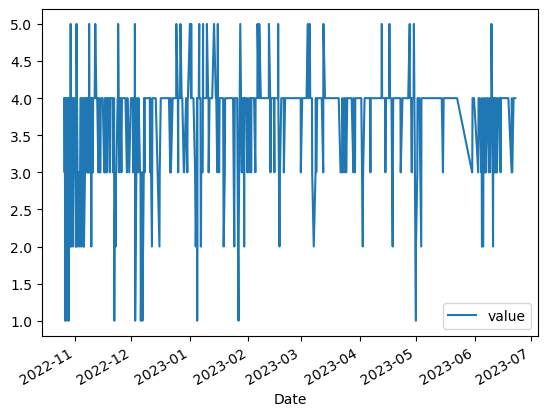

In [25]:
feeling_data.plot(x='Date', y='value');

In [38]:
# the graph isn't super meaningful of course, as moods flucuate too rapidly
# modeling the data and looking for trends and relationships between factors should be better

In [39]:
# feelings (1=bad ... 5=great) as response variable, "effect" ?
# Ordinal Logistic Regression

# Tags

In [35]:
# glancing at the tag data, I'm disapointed not to see a datetime column
# date was the main plan for joining on other data
# I need some sort of explanation for other columns though, tag_type for instance
tag_data = pd.read_json(tag_data_location, lines=True)

In [36]:
tag_data.head()

,name,tag_type,flags,shape,is_locked,area_names,children,parent
0,adult,4,[9],xxxx,NaN,NaN,NaN,NaN
1,affirmation,4,[9],xxxx,NaN,NaN,NaN,NaN
2,anger,1,NaN,NaN,1.0,"[emotion, happiness]",[angry],NaN
3,angry,1,[13],xxxx,1.0,"[emotion, happiness]",NaN,anger
4,animal,4,[9],xxxx,NaN,NaN,NaN,NaN


In [37]:
tag_data.groupby('name').count()

,tag_type,flags,shape,is_locked,area_names,children,parent
name,,,,,,,
adult,1,1,1,0,0,0,0
affirmation,1,1,1,0,0,0,0
anger,1,0,0,1,1,1,0
angry,1,1,1,1,1,0,1
animal,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
world,1,1,1,0,0,0,0
write,1,1,1,0,1,0,1
writing,1,0,0,0,1,1,0
